# Chapter 3: Introduction to Machine Learning for Anomaly Detection

## Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Generate the dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [3]:
# Print the data
print("Data:\n")
pd.DataFrame(X).head()

Data:



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.202454,0.751167,-1.511882,0.213769,1.630152,1.346480,0.509842,-1.053533,-1.081661,0.681781,0.714367,0.255484,-0.967784,1.201209,0.870392,-1.412459,1.619429,-1.569781,0.637088,-0.465059
1,-0.293398,-0.461850,-1.035038,-1.438745,-0.475255,0.907969,0.060521,-0.764904,-0.691158,0.242850,0.808364,-0.101734,-1.300474,0.501156,0.370749,-1.778318,1.343988,-1.367495,0.776554,-0.306634
2,-0.233539,1.594137,-0.243024,-0.521316,-1.405258,0.910422,0.170205,-0.745909,-0.707808,0.327360,0.684262,0.003929,-1.819449,0.253314,0.455330,0.297799,1.250208,-1.251746,0.644517,0.742057
3,-0.449354,0.457298,0.333863,-0.823251,1.428931,0.713167,-0.347749,-0.676813,-0.489517,-0.111904,1.090729,-0.462263,0.868201,-1.060633,-0.010449,-0.511033,1.407223,-1.505204,1.094073,0.846864
4,-0.538559,0.919059,0.140802,-2.017550,0.561341,1.762362,0.173310,-1.473935,-1.349069,0.514124,1.504640,-0.143451,-0.416811,0.522126,0.762236,-0.044134,2.559005,-2.593398,1.438896,1.562432


In [4]:
pd.DataFrame(y, columns=['Target'])['Target'].value_counts()

0    990
1     10
Name: Target, dtype: int64

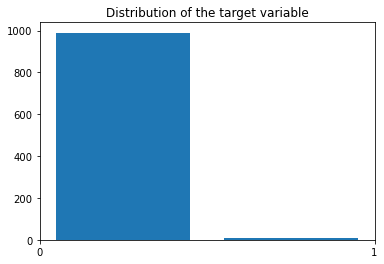

In [5]:
# Plot the target variable
plt.hist(y, bins=2, rwidth=0.8)
plt.title("Distribution of the target variable")
plt.xticks([0,1])
plt.show()

In [6]:
# Split the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [8]:
# Predict the test set results
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [9]:
# Evaluate the model
print("Classification Report: \n", classification_report(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       197
           1       1.00      0.67      0.80         3

    accuracy                           0.99       200
   macro avg       1.00      0.83      0.90       200
weighted avg       1.00      0.99      0.99       200

ROC AUC Score:  0.8333333333333333


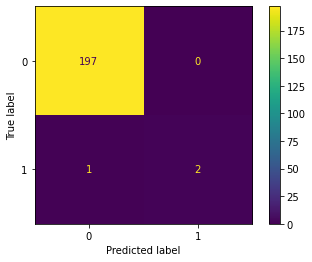

In [10]:
# Plot the confusion matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()

# Decision Tree Classifier

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, plot_confusion_matrix
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Print the data
print("Data:\n")
pd.DataFrame(X, columns=iris.feature_names).head()

Data:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
pd.DataFrame(y, columns=['Species'])['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

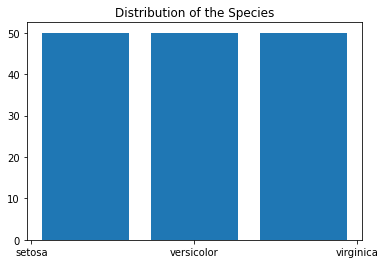

In [13]:
# Plot the target variable
plt.hist(y, bins=3, rwidth=0.8)
plt.title("Distribution of the Species")
plt.xticks([0,1,2], iris.target_names)
plt.show()

In [14]:
# Split the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Predict the test set results
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [16]:
# Evaluate the model
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



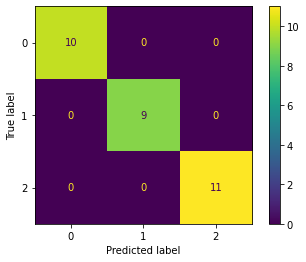

In [17]:
# Plot the confusion matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()

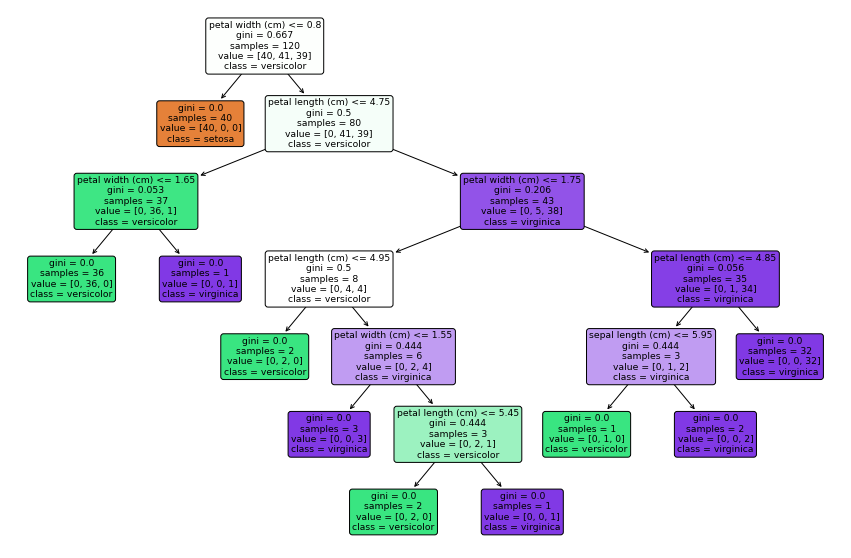

In [18]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(model, 
          filled=True, 
          rounded=True, 
          class_names=iris.target_names, 
          feature_names=iris.feature_names)
plt.show()

In [19]:
# Create and train a decision tree classifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

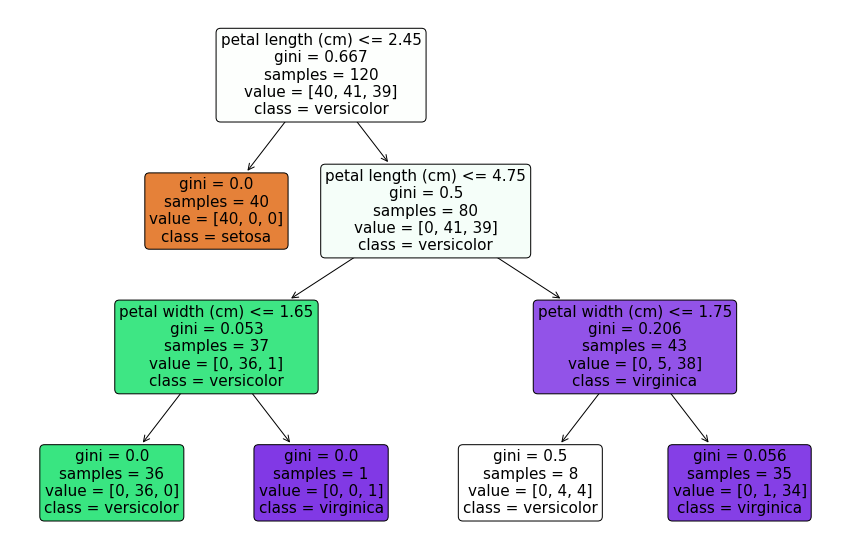

In [20]:
# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(model, 
          filled=True, 
          rounded=True, 
          class_names=iris.target_names, 
          feature_names=iris.feature_names)
plt.show()

## Random Forest

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Generate a random n-class classification problem
X, y = make_classification(n_samples=10000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

In [22]:
# Split the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Create and fit the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
# Predict the test set results
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1978
           1       0.85      0.50      0.63        22

    accuracy                           0.99      2000
   macro avg       0.92      0.75      0.81      2000
weighted avg       0.99      0.99      0.99      2000



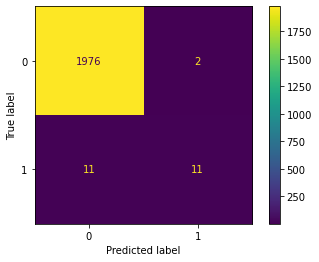

In [26]:
# Plot the confusion matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()

AUC Score: 0.8480099273830315


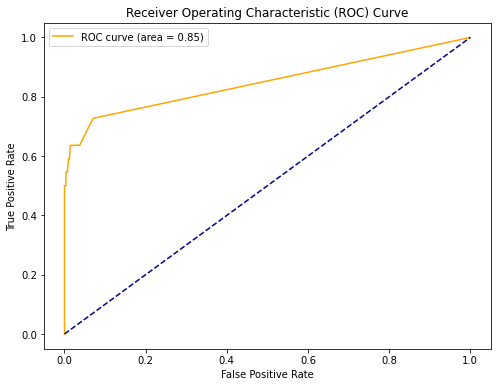

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data.
y_probs = model.predict_proba(X_test)

# Keep only the positive class
y_probs = y_probs[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score}")

# Create a plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [28]:
# Since our example uses a numpy array instead of a features dataset, let's name our features with a number
feature_names = []
for feature_nbr in range(1, X.shape[1]+1):
    feature_names.append(f"feature_{feature_nbr}")

# Extract feature importances
importances = model.feature_importances_
importance_series = pd.Series(importances, index=feature_names)
importance_series.sort_values(ascending=False, inplace=True)

print(importance_series)

feature_10    0.193501
feature_17    0.180760
feature_18    0.141687
feature_3     0.094844
feature_5     0.072718
feature_15    0.066034
feature_4     0.036328
feature_20    0.028864
feature_9     0.026384
feature_1     0.025812
feature_6     0.021394
feature_19    0.021148
feature_13    0.014128
feature_14    0.014077
feature_11    0.013372
feature_12    0.012125
feature_2     0.011528
feature_16    0.010593
feature_8     0.007833
feature_7     0.006871
dtype: float64


## Support Vectors Classifier

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Generate a random n-class classification problem
X, y = make_classification(n_samples=10000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# Split the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# create a SVC model
model_svc = SVC(kernel='linear', probability=True, random_state=42)

In [31]:
# train the model
model_svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [32]:
# make predictions
y_pred_svc = model_svc.predict(X_test)
y_probs_svc = model_svc.predict_proba(X_test)[:, 1]  # keep probabilities for the positive outcome only

In [33]:
print("Classification Report: ")
print(classification_report(y_test, y_pred_svc))

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1978
           1       1.00      0.45      0.62        22

    accuracy                           0.99      2000
   macro avg       1.00      0.73      0.81      2000
weighted avg       0.99      0.99      0.99      2000



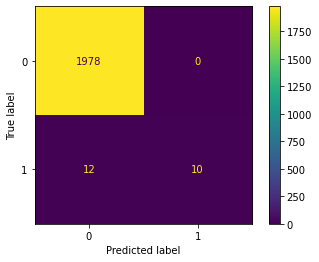

In [34]:
# Plot the confusion matrix
plot_confusion_matrix(model_svc, X_test, y_test)
plt.show()

AUC Score: 0.9055290008272819


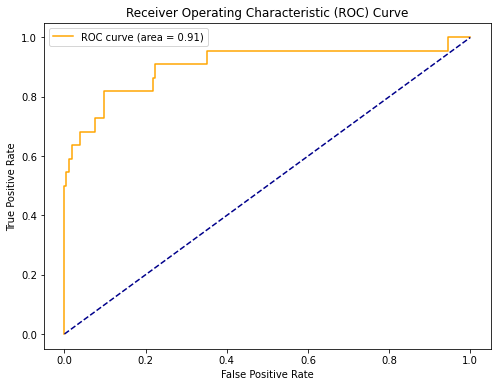

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data.
y_probs = model_svc.predict_proba(X_test)

# Keep only the positive class
y_probs = y_probs[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score}")

# Create a plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()